In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import json
import pandas as pd
import numpy as np
from urllib import parse
import requests
from youtubeApi import YoutubeApi
from utils import Utils

email = 'kjmkjk097@gmail.com'
yt = YoutubeApi()
ut = Utils()

In [2]:
# search query
searchQuery = '빠니보틀 태국'
data = yt.getDictBySearchQuery(searchQuery, 1)
data

{'kind': 'youtube#searchListResponse',
 'etag': '1JCCnM-p16g2M2ojsFFZKtzXBpo',
 'nextPageToken': 'CAEQAA',
 'regionCode': 'KR',
 'pageInfo': {'totalResults': 54974, 'resultsPerPage': 1},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'ifQJBcFqsUJlUemjEPX-Kph2PL8',
   'id': {'kind': 'youtube#video', 'videoId': 'F2utz6L76D0'},
   'snippet': {'publishedAt': '2022-10-11T03:00:08Z',
    'channelId': 'UCNhofiqfw5nl-NeDJkXtPvw',
    'title': '방콕 풀코스, 동남아 안 가본 곽튜브와 함께 【쇼트트립】',
    'description': '2박~ 3일! 15:30 좁밥트립 시작 -------------------------------------- 카메라 Gopro10 Galaxy S21 -------------------------------------- 배경음악 ...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/F2utz6L76D0/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/F2utz6L76D0/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/F2utz6L76D0/hqdefault.jpg',
      'width': 480,
      'height': 360}},
  

In [28]:
# 채널의 대만 영상 정보 가져오기
channelId = data['items'][0]['snippet']['channelId']
videoId = data['items'][0]['id']['videoId']

data2 = yt.getDictByVideoId(videoId)
data2

{'viewCount': '4282043',
 'likeCount': '46869',
 'favoriteCount': '0',
 'commentCount': '3483'}

In [29]:
df = ut.make_df(data)
df2 = ut.makeDataFromStatistics(data2)

In [30]:
df

,publishedAt,channelId,title,description,thumbnails,channelTitle,liveBroadcastContent,publishTime,videoId
0,2022-10-11T03:00:08Z,UCNhofiqfw5nl-NeDJkXtPvw,"방콕 풀코스, 동남아 안 가본 곽튜브와 함께 【쇼트트립】",2박~ 3일! 15:30 좁밥트립 시작 ------------------------...,{'default': {'url': 'https://i.ytimg.com/vi/F2...,빠니보틀 Pani Bottle,none,2022-10-11T03:00:08Z,F2utz6L76D0


In [31]:
df2

,viewCount,likeCount,favoriteCount,commentCount
0,4282043,46869,0,3483


In [46]:
final_data = pd.concat([df, df2], axis=1)

In [47]:
final_data['country'] = '태국'

In [48]:
# column 드롭, 추가 및 재 정렬
# 답변 오는거 보고 추가 드롭, 추가, 그리고 순서대로 재정렬 해야함
# 그리고 class method로 만들기
final_data = ut.dropAndReorganizeColumns(final_data)


In [49]:
final_data

,videoId,title,description,viewCount,likeCount,favoriteCount,commentCount,publishedAt,channelId,channelTitle,country
0,F2utz6L76D0,"방콕 풀코스, 동남아 안 가본 곽튜브와 함께 【쇼트트립】",2박~ 3일! 15:30 좁밥트립 시작 ------------------------...,4282043,46869,0,3483,2022-10-11T03:00:08Z,UCNhofiqfw5nl-NeDJkXtPvw,빠니보틀 Pani Bottle,태국


In [50]:
# 최종 데이터 프레임 csv에 저장
final_data.to_csv('./data/thailand_youtube.csv', encoding='utf-8-sig', index=False)

In [315]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   publishedAt           1 non-null      object
 1   channelId             1 non-null      object
 2   title                 1 non-null      object
 3   description           1 non-null      object
 4   thumbnails            1 non-null      object
 5   channelTitle          1 non-null      object
 6   liveBroadcastContent  1 non-null      object
 7   publishTime           1 non-null      object
 8   videoId               1 non-null      object
 9   viewCount             1 non-null      object
 10  likeCount             1 non-null      object
 11  favoriteCount         1 non-null      object
 12  commentCount          1 non-null      object
 13  country               1 non-null      object
dtypes: object(14)
memory usage: 244.0+ bytes


2019
9


In [319]:
asia_data

,Year,month,법무부_명수,법무부_전년대비,일본_명수,일본_전년대비,중국_명수,중국_전년대비,베트남_명수,베트남_전년대비,...,사이프러스_명수,사이프러스_전년대비,부탄_명수,부탄_전년대비,요르단_명수,요르단_전년대비,네팔_명수,네팔_전년대비,예멘_명수,예멘_전년대비
0,2004년,1월,793478.0,NaN,164785.0,NaN,186246.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004년,2월,670447.0,NaN,142718.0,NaN,215373.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004년,3월,587629.0,NaN,112516.0,NaN,190382.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004년,4월,642413.0,NaN,120427.0,NaN,223062.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004년,5월,680185.0,NaN,115659.0,NaN,202592.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2019년,누계,28714247.0,0.000636,5584597.0,-0.259234,4346567.0,0.036924,4290802.0,0.248994,...,NaN,NaN,1408.0,0.410822,20322.0,0.356156,31108,-0.16416787575904135,NaN,NaN
260,2020년,누계,4276006.0,-0.851084,487939.0,-0.912628,0.0,NaN,840041.0,-0.804223,...,0.0,NaN,142.0,-0.899148,6825.0,-0.664157,6944,-0.7767776777677768,0,NaN
261,2021년,누계,1222541.0,-0.714093,18947.0,-0.961169,0.0,NaN,32500.0,-0.961311,...,0.0,NaN,0.0,NaN,1031.0,-0.848938,0,NaN,0,NaN
262,2022년,누계,6554031.0,4.360991,1012751.0,52.451787,0.0,NaN,769167.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN


188

C:\Users\TT21\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TT21\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TT21\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TT21\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


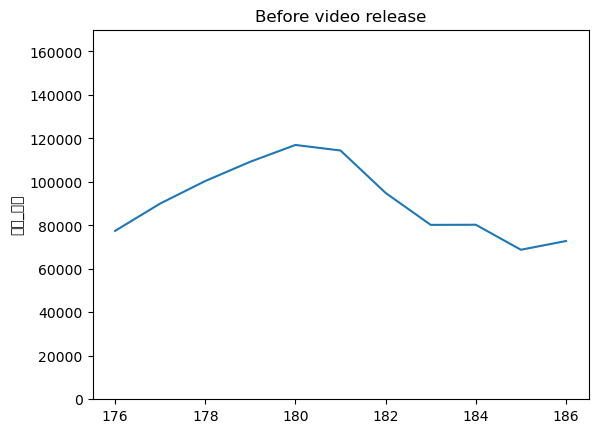

C:\Users\TT21\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TT21\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TT21\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TT21\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


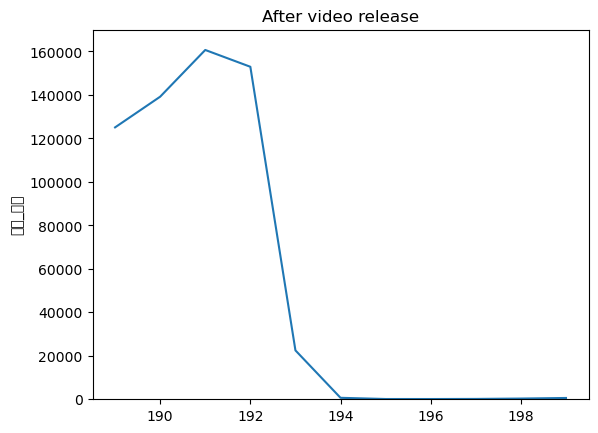

In [324]:
sns.lineplot(data = taiwan_after)
plt.ylim(0, 170000)
plt.title('After video release')
plt.show()